# Case Study 1 - Project 1: Heart Disease Prediction

This notebook contains a full implementation of a prediction system for various heart diseases using binary classification. The overall goal of this notebook is to go through and understand all steps of the ML workflow, which can be summarized as follows:

1. Look at the big picture and formulate the Problem to solve.
2. Get relevant data, explore and visualize to understand the data
3. Set Benchmark for evaluation - what do you want to achive?
4. Prepare data for Machine Learning, select features, ...
5. Choose appropriate model and train it
6. Look at what else you can try: Fine tune your model,... and iterate
7. Present your solution
8. Deploy, Monitor and Maintain (this part will be covered in another project)



**Initial Question**: *How would you approach the problem?*
> **Answer**: I would start by looking for existing literature as well as already implemented projects. After an initial gathering of understanding I would search for datasets to inspect and look for features to include or exclude in training/testing. After preparing the data for training, i would select a machine learning model based on existing literature projects to train and evaluate using the data selected before. Finally, I would tweak the model and or the dataset in order to improve prediction accuracy. After achieving a minimum required accuracy, i would prepare and present the results and finally deploy the model.

## Imports

In [68]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score

import seaborn as sns

import ucimlrepo as uci

## 1. Project Understanding

**Initial Question**: *How does the company expect to use and benefit from this model?*
> **Answer**: Using binary classification, this model could be used to increase the efficiency of recognizing heart diseases in hospitals early and thus provide appropriate treatment for patients early. This could be done by collecting the vitality parameters of the patients that are needed as featuers for the prediction model. The benefits of this could be an overall increase of health in the population and a dicrease in fatal cases of heart diseases.

## 2. Gathering Data

For this step, we would normally compare between different public datasets (or create our own depending on use case and complexity) in order to decide which data to use. For the first project of this course, we will keep it simple and use the dataset provided in the project specification.

The dataset used for this project is the [Heart Disease Dataset](https://archive.ics.uci.edu/dataset/45/heart+disease)  from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/), which provides a python package called **ucimlrepo** for loading the dataset. It can be loaded as follows:

In [37]:
heart_disease = uci.fetch_ucirepo(id=45) 

# load data as dataframes
X = heart_disease.data.features 
y = heart_disease.data.targets 

After loading the data, we start by looking at the metadata to get more information about the dataset itself.

In [38]:
from pprint import pprint

pprint(heart_disease.metadata)

{'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long '
             'Beach',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'This database contains 76 attributes, but all '
                                'published experiments refer to using a subset '
                                'of 14 of them.  In particular, the Cleveland '
                                'database is the only one that has been used '
                                'by ML researchers to date.  The "goal" field '
                                'refers to the presence of heart disease in '
                                'the patient.  It is integer valued from 0 (no '
                  

The next step is to look at the different input features to get a better understanding of what the dataset contains and what can be used for training the binary classifier.

In [39]:
heart_disease.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


Finally, the output data y can be inspected for further understanding of what the output can and should look like for the binary classifier.

*Note that it would be necessary to evaluate the qualityy of the dataset. For the sake of simplicity of this first project, this step will be skipped*

### 3. Selecing Evaluation Metrics

Evaluation metrics are used to get a better understanding of how good the binary classifier is at predicting heart diseases from a given input. The choice of the metrics depends on the project and what the goals are.
In the case of this project, metrics for binary classifiers in supervised learning are used.

For this first project, a confusion matrix will be used to evaluate the classifier.
From the confusion matrix, various other metrics like accuracy, precision, recall and F1-score can be derived.

## 4. Data Preparation

In this step, we prepare the data in order to train and test the data later. This includes various steps like cleaning/transforming the data and splitting it into training and testing data.

For the heart disease dataset, we can take a look at the target variable y:

In [43]:
y["num"].unique()

array([0, 2, 1, 3, 4])

Here we can see that the target variable contains five different output values for differnet types of heart disease. In this project, a binary classification is implemented, which only differentiates between "No Heart Disease" as 0 and "Hart Disease as 1. Therefore, we need to update the columns to account for that. We do that by first mergin X and y, then we can limit the classification to a binary classification like this:

In [47]:
df=pd.concat([X, y] , axis=1)
df['target']=df["num"].apply(lambda x: 0 if x==0 else 1)
df.drop("num", axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


Now we can look for missing values by looking at all the columns of the dataframe:

In [48]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


The `ca`column aswell as the `thal` column contain missing values for a few rows, This can be seen using the isna() function of pandas.

In [50]:
df[df['ca'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [51]:
df[df['thal'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,1


Those rows need to be removed before any further steps are taken. This can be done easily using the dropna() function of pandas:

In [52]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB


Now that the data is cleaned, we can split the into X and y again and then further split them into train and test data

In [54]:
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

**Question**: *Wait! Before you look at the data any further, you need to create a test set, put it aside, and never look at it.*
*Why should you do this at this stage?*
> **Answer**: The purpose of the testing data is to validate a models performance after training. When testing data is already known during training, the resulting models performance on the testing is skewed because the model has already seen the data and is therefore biased.

## 5. Model Selection, Training and Evaluation

In this step, a model is selected depending on the use case and type of project. In this case, a model for binary classification needs to be selected. For the sake of simplicity, we first start with a Random forest classifier as the first baseline. This can be done easily using sklearn, which already implements a Random forest classifier. First, we need to create the classifier as follows:

In [ ]:
classifier_rf = RandomForestClassifier() # Create classifier, optionally adjust hyperparameters
classifier_rf.get_params() # inspect params after instantiation

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Now we can train the classifier on the training data that was prepared beforehand:

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

Finally, we can predict the test data using our trained Random forest classifier. This can be done like this:

In [ ]:
y_pred=classifier_rf.predict( X_test) # predict target for input testing data
print(y_pred)
y_test=np.array(y_test) # print prediction and test data in order to compare classification
print(y_test)

print(classifier_rf.score(X_test, y_test)) # print prediction score of test data
print(classifier_rf.score(X_train, y_train)) # print prediciton score of training data

[1 1 0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0]
[1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1
 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0]
0.8333333333333334
1.0


**Question**: *What does a score of 1 represent? Explain the phenomena*
> **Answer**: The prediction score of 1 represents a 100% accuracy for predicting heart diseases for a given input. This happens for the prediction of the training data, because it already knows the data from training and has a bias towards it. This can be an indicator for overfitting, although the relatively high accuracy for the training data does not implicate overfitting in this case.

Now we can use a confusion matrix for evaluating the Random forest classifiers performance. This can easily be done with the built in functions by sklearn:

In [65]:
print( confusion_matrix(y_test, y_pred),"\n", classification_report(y_test, y_pred), "\n",accuracy_score(y_test, y_pred))

[[27  4]
 [ 6 23]] 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84        31
           1       0.85      0.79      0.82        29

    accuracy                           0.83        60
   macro avg       0.84      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60
 
 0.8333333333333334


For better readability, the data is then visualized:

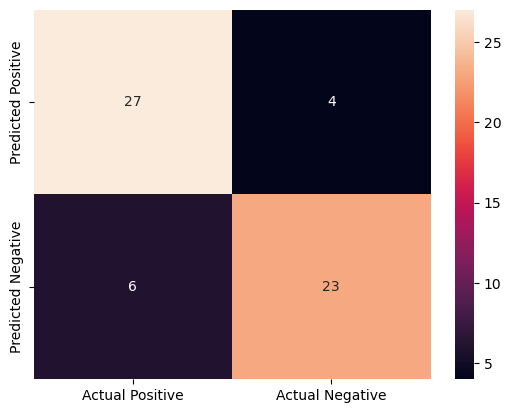

In [71]:
X_labels = ["Actual Positive", "Actual Negative"]  # Replace 0,1 with A, B, C, D
y_labels = ["Predicted Positive", "Predicted Negative"]

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), xticklabels=X_labels, yticklabels=y_labels, annot=True, ax=ax)
plt.show()

**Question**: *Explain what you see on a confusion matrix, and what are precision, recall and F1 score.*
> **Answer**: A confusion matrix is split into four categories, two of which are on the x and two are on the y axis: X = [Actual Positive, Actual Negative] and y = [Predicted Positive, Predicted Negative]. This can be used to compare the predicted results to the actual results.
In addition, the confusion matrix can be used to calculate precision, recall, and the F1 score.
The precision is the amount of predicted positives that are actually positive.
The recall describes the amount of actual positives that were identified. The key difference to the precision is that the precision only takes the predicted positives into account, while the recall takes all predictions into account.
The F1-Score is calculated from recall and position and can be used as the mean between those two metrics. It can be seen as the combination of both false positives and false negatives. 

Now after evaluating the model, we can see that it is not very accurate at identifying actual positives. Therefore, hyperparameters need to be adjusted in order to increase the prediction performance. For the random forest, we can adjust the amount of estimators used. This can be done using a for loop, to test different amounts of estimators:

In [78]:
res={}
for i in range(10,500, 50): 
    classif_i=RandomForestClassifier(n_estimators=i)
    classif_i.fit(X_train, y_train)
    res[i]=  classif_i.score(X_test, y_test)
print(res)
print("Max score :", max(res.values()), "For i=", max(res, key=res.get), "\n")

{10: 0.8, 60: 0.8166666666666667, 110: 0.8166666666666667, 160: 0.8, 210: 0.8, 260: 0.8166666666666667, 310: 0.8333333333333334, 360: 0.8333333333333334, 410: 0.8166666666666667, 460: 0.8166666666666667}
Max score : 0.8333333333333334 For i= 310 



**Question**: *Re-run the above cell, do you get the same result? Why?*
> **Answer**: No, different results are achieved everytime, though to randomness introduced in the random forest classifier. In a process called "bootstrap sampling", multiple variants of descision trees are created during training with different subsets of data to be used for training, which are selected randomly. The randomness for results can be prevented by setting a seed for the random generation.

For reprodubability, we set a random_state to prevent varying results for each execution of the loop.

In [85]:
res={}
for i in range(10,500, 50): 
    classif_i=RandomForestClassifier(n_estimators=i, random_state=12)
    classif_i.fit(X_train, y_train)
    res[i]=  classif_i.score(X_test, y_test)
print(res)
print("Max score :", max(res.values()), "For i=", max(res, key=res.get), "\n")

{10: 0.7833333333333333, 60: 0.8166666666666667, 110: 0.8, 160: 0.8166666666666667, 210: 0.8, 260: 0.8333333333333334, 310: 0.8333333333333334, 360: 0.8333333333333334, 410: 0.8333333333333334, 460: 0.8166666666666667}
Max score : 0.8333333333333334 For i= 260 



## 6. Experimentation